<a href="https://colab.research.google.com/github/Vinisenso/Electric_Field/blob/main/LE404_Trabalho_Num%C3%A9rico_01_Campo_el%C3%A9trico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

LE404A - Física Geral III

***Trabalho Numérico 01:*** *Cálculo do Campo Elétrico de um Anel Uniformemente Carregado - Posição Qualquer* 

Responsável: Marcelo Zoéga Maialle

Data: 30/09/2021

Integrantes do Grupo:
*   Augusto Chebel Machado            RA: 231762
*   Leonardo de Lima Paiva            RA: 220057
*   Lucas Tramonte                    RA: 182697
*   Vinícius Consentino Muniz         RA: 245271


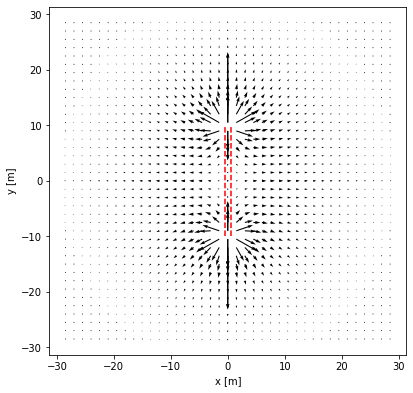

In [ ]:
# código para plotar o campo vetorial:

# importando as bibliotecas que serão utilizadas:
import numpy as np
import matplotlib.pyplot as plt

# dados de entrada:
Q = 10**(-6)  # [C]
R = 10        # [m]
K = 9*10**(9) # [N*m²/C²]

dlc = Q/(2*np.pi*R)   # densidade linear de carga

N_elem = 20           # número de elementos geradores dos pontos da grade (x e y)

elem = 0
lista_elem = [0]
for i in range(0, N_elem - 1):    # gerando os elementos
  elem = elem + (3*R/N_elem)      # valores no passo de (3*R/20)
  lista_elem.append(elem)         # adicionando à lista

coord_x = N_elem*lista_elem       # lista que armazena as coordenadas x

coord_y = []                      # lista que armazena as coordenadas y
for i in range (0, N_elem):
  cont = 0
  while (cont < N_elem):
    coord_y.append(lista_elem[i])
    cont = cont + 1
# ao final desse processo, temos duas listas x e y, que juntas formam os pontos (x, y) da grade

N = 100                        # nº de pedaços "infinitesimais" de theta (anel)
dtheta = 2*np.pi/N              # um pedaço "infinitesimal" dtheta

# definindo as funções Ex e Ey, para x e y informados (integração numérica - regra do ponto médio):
def Ex(x, y):
  result = 0
  for i in range (0, N+1):
    result = result + dtheta*K*dlc*R*x/((np.sqrt(x**2 + y**2 - 2*y*R*np.sin(dtheta/2 + i*dtheta) + R**2)**3))
  return result

def Ey(x, y):
  result = 0
  for i in range (0, N+1):
    result = result + dtheta*K*dlc*R*(y-R*np.sin(dtheta/2 + i*dtheta))/((np.sqrt(x**2 + y**2 - 2*y*R*np.sin(dtheta/2 + i*dtheta) + R**2)**3))
  return result

dirEx = []                                  # intensidade de E na direção x (será o indicador da direção na função quiver())
dirEy = []                                  # intensidade de E na direção y
for i in range (0, len(coord_x)):           # calculando a intensidade e adicionando nas listas para cada para (x, y)
  dirEx.append(Ex(coord_x[i], coord_y[i]))
  dirEy.append(Ey(coord_x[i], coord_y[i]))

coord_x_neg = []                            # criando os pontos com coordenadas negativas
coord_y_neg = []
dirEx_neg = []                              # criando as direções com coordenadas negativas
dirEy_neg = []
for i in range (0, len(coord_x)):
  coord_x_neg.append(-1*coord_x[i])
  coord_y_neg.append(-1*coord_y[i])
  dirEx_neg.append(-1*dirEx[i])
  dirEy_neg.append(-1*dirEy[i])
# ao final desse processo temos para cada par (x,y) uma direção (Ex, Ey) para todos os pontos da grade

# plotando o campo vetorial
plt.figure(1, figsize=[6.4, 6.4])                                  # cria a figura
plt.quiver(coord_x, coord_y, dirEx, dirEy, scale=3000)             # plt.quiver tem como argumentos: (ponto x, ponto y, direção x, direção y)
plt.quiver(coord_x_neg, coord_y, dirEx_neg, dirEy, scale=3000)
plt.quiver(coord_x, coord_y_neg, dirEx, dirEy_neg, scale=3000)
plt.quiver(coord_x_neg, coord_y_neg, dirEx_neg, dirEy_neg, scale=3000)
#plt.title("Campo elétrico vetorial para um anel carregado uniformemente - plano xy")
plt.xlabel('x [m]')
plt.ylabel('y [m]')
plt.vlines(-0.05*R, -R, R, colors='red', linestyles='dashed') # representação do anel
plt.vlines(0.05*R, -R, R, colors='red', linestyles='dashed')  # apenas para efeitos de visualização, o anel não possui "espessura", é linear

plt.show() 

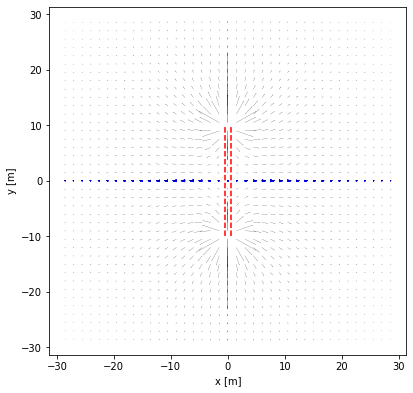

In [ ]:
# plotando os vetores teóricos no eixo x para comparação visual com os vetores numéricos:

def E_teor(x):                                  # definindo a função que calcula a intensidade do campo no eixo x (para um anel)
  return K*Q*x/(np.power((x**2 + R**2), 3/2))

Eteor = []                                      # lista para armazenar os valores para cada ponto do tipo (x, 0)
Eteor_neg = []                                  # valores negativos do campo no eixo x
for i in range (0, len(coord_x)):               # adicionar à lista os valores calculados pela função para cada x da grade
  Eteor.append(E_teor(coord_x[i]))
  Eteor_neg.append(E_teor(coord_x_neg[i]))

# plotando o campo vetorial comparativo
plt.figure(2, figsize=[6.4, 6.4])
plt.quiver(coord_x, 0, Eteor, 0, color='blue', scale=3000)
plt.quiver(coord_x_neg, 0, Eteor_neg, 0, color='blue', scale=3000)
plt.quiver(coord_x, coord_y, dirEx, dirEy, width=0.0005, scale=3000)
plt.quiver(coord_x_neg, coord_y, dirEx_neg, dirEy, width=0.0005, scale=3000)
plt.quiver(coord_x, coord_y_neg, dirEx, dirEy_neg, width=0.0005, scale=3000)
plt.quiver(coord_x_neg, coord_y_neg, dirEx_neg, dirEy_neg, width=0.0005, scale=3000)
#plt.title("Visualização dos vetores teóricos no eixo x sobrepostos aos obtidos numericamente")
plt.xlabel('x [m]')
plt.ylabel('y [m]')
plt.vlines(-0.05*R, -R, R, colors='red', linestyles='dashed') # apenas para efeitos de visualização, o anel não possui "espessura", é linear
plt.vlines(0.05*R, -R, R, colors='red', linestyles='dashed')

plt.show()

In [ ]:
len(coord_x)

400

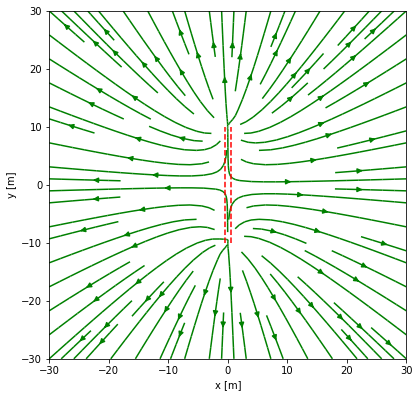

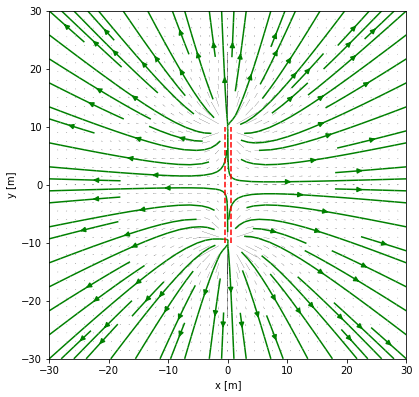

In [ ]:
# código para plotar as linhas de campo:

# OBS: função streamplot exige que as coordenadas e direções sejam dadas em matrizes, 
#      por isso a necessidade de criar uma nova grade de pontos e novas funções de direções

# Nova grade x e y:
x,y = np.meshgrid(np.linspace(-3*R, 3*R, 2*N_elem),np.linspace(-3*R, 3*R, 2*N_elem))    

# novas funções de direções:
def f_x(theta):
  return K*dlc*R*x/((np.sqrt(x**2 + y**2 - 2*y*R*np.sin(theta) + R**2)**3))

def f_y(theta):
  return K*dlc*R*(y-R*np.sin(theta))/((np.sqrt(x**2 + y**2 - 2*y*R*np.sin(theta) + R**2)**3))

def Ex(x):
  result = 0
  for i in range(0, N+1):
    result = result + dtheta*f_x(i*dtheta)
  return result

def Ey(y):
  result1 = 0
  for j in range(0, N+1):
    result1 = result1 +  dtheta*f_y(j*dtheta)
  return result1

# plotando as linhas de campo:
plt.figure(3, figsize=[6.4, 6.4])
plt.streamplot(x, y, Ex(x), Ey(y), density=1.0, color='green')
#plt.title("Linhas de campo - plano xy")
plt.xlabel('x [m]')
plt.ylabel('y [m]')
plt.vlines(-0.05*R, -R, R, colors='red', linestyles='dashed') # apenas para efeitos de visualização, o anel não possui "espessura", é linear
plt.vlines(0.05*R, -R, R, colors='red', linestyles='dashed')

plt.show()
print()

# plotando as linhas de campo com o campo vetorial de fundo:
plt.figure(4, figsize=[6.4, 6.4])
plt.streamplot(x, y, Ex(x), Ey(y), density=1.0, color='green')
plt.quiver(coord_x, coord_y, dirEx, dirEy, width=0.0005, scale=3000)
plt.quiver(coord_x_neg, coord_y, dirEx_neg, dirEy, width=0.0005, scale=3000)
plt.quiver(coord_x, coord_y_neg, dirEx, dirEy_neg, width=0.0005, scale=3000)
plt.quiver(coord_x_neg, coord_y_neg, dirEx_neg, dirEy_neg, width=0.0005, scale=3000)
#plt.title("Linhas de campo - plano xy")
plt.xlabel('x [m]')
plt.ylabel('y [m]')
plt.vlines(-0.05*R, -R, R, colors='red', linestyles='dashed') # apenas para efeitos de visualização, o anel não possui "espessura", é linear
plt.vlines(0.05*R, -R, R, colors='red', linestyles='dashed')

plt.show()

In [ ]:
# criando uma tabela para comparação entre valores numéricos e teóricos

import pandas as pd
import math

# definindo a função que vai calcular a magnitude do campo a partir das componentes Ex e Ey numéricas
def mag_E(E_x, E_y):
  return np.sqrt(np.power(E_x, 2) + np.power(E_y, 2))

magEnum = []                                   # magnitude de cada ponto (numérico)
magEalta=[]                                    # magnitude de cada ponto que é muito intensa.(numérico)
cx=[]                                          # lista para pegar as cordenadas que tem intensidade de campo alta.
cy=[]
for i in range(0, len(lista_elem)):
  magEnum.append(round(mag_E(dirEx[i], dirEy[i]), 4))

for i in range(0,len(coord_x)):                # estrutura para apurar os pontos que possuem magnitude de campo maiores que 100 N/C.      
  if mag_E(dirEx[i], dirEy[i]) > 100: 
    magEalta.append(mag_E(dirEx[i], dirEy[i]))
    cx.append(coord_x[i]) 
    cy.append(coord_y[i])
magEteor = []                                   
for x in lista_elem:                           # adicionar à lista os valores calculados pela função para cada x da grade 
  magEteor.append(round(E_teor(x), 4))

erro  = []
for i in range (0, len(magEnum)):
  erro_num_teor = 100*math.fabs((magEteor[i] - magEnum[i])/magEteor[i])
  erro.append(round(erro_num_teor, 4))

# criando a tabela:
dados = {'Coordenada x [m]': lista_elem, '|E numérico|[N/C]': magEnum, '|E teórico|[N/C]': magEteor, 'Erro [%]': erro}

pd.DataFrame(dados)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in double_scalars


,Coordenada x [m],|E numérico|[N/C],|E teórico|[N/C],Erro [%]
0,0.0,0.0283,0.0000,inf
1,1.5,13.1875,13.0569,1.0002
2,3.0,23.9632,23.7260,0.9997
3,4.5,31.0205,30.7134,0.9999
4,6.0,34.3880,34.0475,1.0001
5,7.5,34.9056,34.5600,1.0000
6,9.0,33.5961,33.2634,1.0002
7,10.5,31.3076,30.9976,1.0001
8,12.0,28.6194,28.3360,1.0001
9,13.5,25.8790,25.6227,1.0003


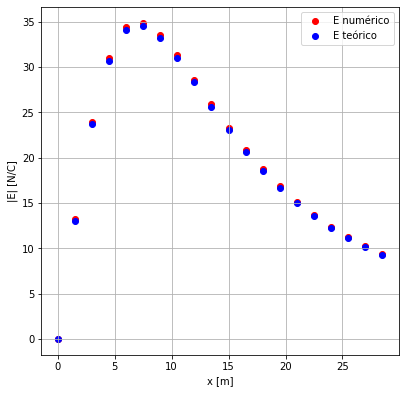

In [ ]:
# criando um gráfico comparando a intensidade no eixo x:

plt.figure(1, figsize=[6.4, 6.4])
plt.grid()
plt.scatter(lista_elem, magEnum, color='red', label='E numérico')
plt.scatter(lista_elem, magEteor, color='blue', label='E teórico')
plt.legend()
plt.xlabel('x [m]')
plt.ylabel('|E| [N/C]')

plt.show()

In [ ]:
# criando a tabela para maiores valores de campo (magnitudes):

dados = {'Coordenada x [m]': cx, 'Coordenada y [m]':cy,'|E numérico|[N/C]':magEalta}

pd.DataFrame(dados)


,Coordenada x [m],Coordenada y [m],|E numérico|[N/C]
0,0.0,9.0,247.000625
1,1.5,9.0,148.721895
2,0.0,10.5,590.118564
3,1.5,10.5,194.231357
4,3.0,10.5,103.230936
5,0.0,12.0,162.406237
6,1.5,12.0,129.423635


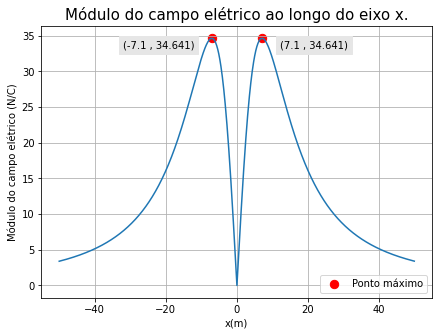

<Figure size 432x288 with 0 Axes>

In [ ]:
# criando o gráfico contínuo da função que calcula o E teórico

x=np.arange(-50,50,0.1)

# criando a figura:
plt.figure(figsize=[7,5])
plt.grid()
plt.title('Módulo do campo elétrico ao longo do eixo x.',fontsize=15)
plt.xlabel('x(m)',fontsize=10)
plt.ylabel('Módulo do campo elétrico (N/C)',fontsize=10)
plt.plot(x,abs(E_teor(x)))

maximo=max(E_teor(x))
maxx=0
for i in x:
  if E_teor(i) == maximo:
    maxx=i

plt.scatter(maxx,(E_teor(maxx)),color='r',s=70,label="Ponto máximo")
plt.scatter(-maxx,(E_teor(maxx)),color='r',s=70)
plt.legend(loc='lower right',fontsize=10)

plt.text(maxx+5,0.96*E_teor(maxx),f"({round(maxx,3)} , {round(E_teor(maxx),3)})",fontsize=10,backgroundcolor='0.9')
plt.text(-maxx-25,0.96*E_teor(maxx),f"({round(-maxx,3)} , {round(E_teor(maxx),3)})",fontsize=10,backgroundcolor='0.9')
plt.show()
# fig = plt.gcf()
plt.savefig('grafico campo.png')
# fig.savefig('teste.png', format='png')